<h1><center>CSCI 6515 - Machine Learning for Big Data (Fall 2023)</h1></center>
<h1><center>Final Project</h1></center>

<b>Group_ID: <code>7</code><b>

<b>Group Members:</b>  

1. <code>Xiaoting_B00685239</code>
2. <code>Xuelian_B00977221</code>
3. <code>Siqi_B00976996</code>

# 1. Dataset Information 

<h4> Dataset Name: <code> Adult</code></h4>
<h4> Link to the Dataset: <code>https://archive.ics.uci.edu/dataset/2/adult</code> </h4>
<h4> Dataset Description: </h4>
<code> The dataset extraction was done by Barry Becker from the 1994 Census detabash. Prediction task is to determine whether a person make over 50k a year. </code>


# 2. Task Information 

<h4> Task Goal: <code> Prediction task is to determine whether a person make over 50k a year. </code></h4>
<h4> Task Description: </h4>
    <code> The task is aiming to predict income above or less and equal to 50k/yr based on their age, educaltion level, race, sex, marital status, etc. Four models are applied for prediction performance comparison, which are respectively logistic regression, random forest, KNN and naive bayes. </code>

# 3. Task Implementation: Coding

### 3.1 Preprocessing 

In [2]:
import pandas as pd
import numpy as np

In [3]:
train_data=pd.read_csv('adult_train.csv')
test_data=pd.read_csv('adult_test.csv')
test_data['Income'] = test_data['Income'].str.replace('.', '')
train_data

C:\Users\henso\AppData\Local\Temp\ipykernel_32844\1705016966.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  test_data['Income'] = test_data['Income'].str.replace('.', '')


,Age,Workclass,Final Weight,Education,Education Number,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per Week,Native Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
discrete_columns = ['Workclass', 'Education', 'Marital Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native Country', 'Income']
continuous_columns = ['Age', 'Final Weight', 'Education Number', 'Capital Gain', 'Capital Loss', 'Hours per Week']

In [5]:
# Checking for missing values
missing_values = train_data.isnull().sum()

# Checking for duplicate rows
duplicate_rows = train_data.duplicated().sum()

missing_values, duplicate_rows

(Age                 0
 Workclass           0
 Final Weight        0
 Education           0
 Education Number    0
 Marital Status      0
 Occupation          0
 Relationship        0
 Race                0
 Sex                 0
 Capital Gain        0
 Capital Loss        0
 Hours per Week      0
 Native Country      0
 Income              0
 dtype: int64,
 24)

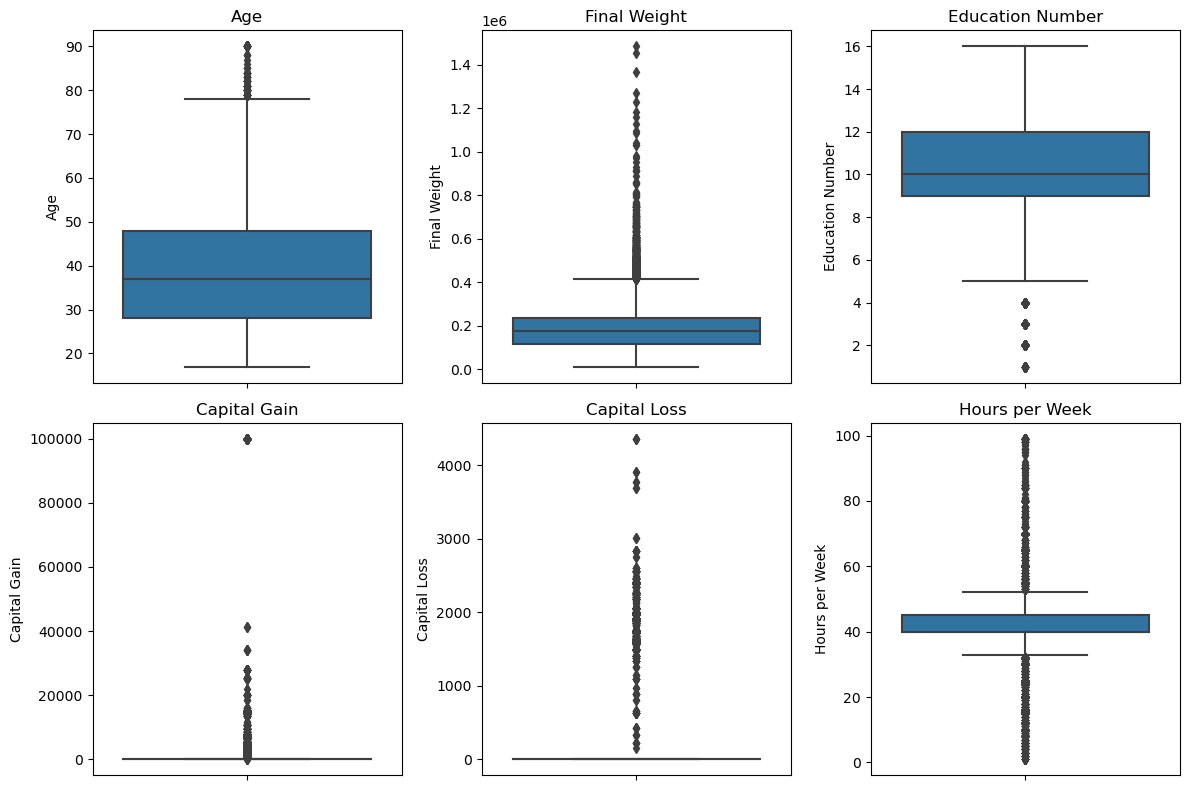

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting boxplots for continuous columns to identify outliers
plt.figure(figsize=(12, 8))

for i, col in enumerate(continuous_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=train_data[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [7]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

scaler = StandardScaler()
scaled_continuous_train = scaler.fit_transform(train_data[continuous_columns])
scaled_continuous_test = scaler.transform(test_data[continuous_columns])

In [8]:
def binary_encode(column, max_bits=None):
    ordinal_encoder = OrdinalEncoder()
    integer_encoded = ordinal_encoder.fit_transform(column.values.reshape(-1, 1)).astype(int).flatten()
    max_value = np.max(integer_encoded)
    num_bits = max_bits if max_bits else int(np.ceil(np.log2(max_value + 1)))
    binary_encoded = ((integer_encoded.reshape(-1, 1) & (2**np.arange(num_bits))) > 0).astype(int)
    binary_encoded = binary_encoded[:, ::-1]
    col_names = [f"{column.name}_bit_{i}" for i in range(num_bits)]
    return pd.DataFrame(binary_encoded, columns=col_names)

binary_encoded_train = pd.concat([binary_encode(train_data[col]) for col in discrete_columns], axis=1)
binary_encoded_test = pd.concat([binary_encode(test_data[col]) for col in discrete_columns], axis=1)

In [10]:
processed_train_data = pd.concat([pd.DataFrame(scaled_continuous_train, columns=continuous_columns), binary_encoded_train], axis=1)
processed_test_data = pd.concat([pd.DataFrame(scaled_continuous_test, columns=continuous_columns), binary_encoded_test], axis=1)
processed_train_data

,Age,Final Weight,Education Number,Capital Gain,Capital Loss,Hours per Week,Workclass_bit_0,Workclass_bit_1,Workclass_bit_2,Workclass_bit_3,...,Race_bit_1,Race_bit_2,Sex_bit_0,Native Country_bit_0,Native Country_bit_1,Native Country_bit_2,Native Country_bit_3,Native Country_bit_4,Native Country_bit_5,Income_bit_0
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,0,1,1,1,...,0,0,1,1,0,0,1,1,1,0
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,0,1,1,0,...,0,0,1,1,0,0,1,1,1,0
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,0,1,0,0,...,0,0,1,1,0,0,1,1,1,0
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,0,1,0,0,...,1,0,1,1,0,0,1,1,1,0
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,0,1,0,0,...,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409,0,1,0,0,...,0,0,0,1,0,0,1,1,1,0
32557,0.103983,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429,0,1,0,0,...,0,0,1,1,0,0,1,1,1,1
32558,1.423610,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429,0,1,0,0,...,0,0,0,1,0,0,1,1,1,0
32559,-1.215643,0.110960,-0.420060,-0.145920,-0.21666,-1.655225,0,1,0,0,...,0,0,1,1,0,0,1,1,1,0


In [11]:
processed_test_data

,Age,Final Weight,Education Number,Capital Gain,Capital Loss,Hours per Week,Workclass_bit_0,Workclass_bit_1,Workclass_bit_2,Workclass_bit_3,...,Race_bit_1,Race_bit_2,Sex_bit_0,Native Country_bit_0,Native Country_bit_1,Native Country_bit_2,Native Country_bit_3,Native Country_bit_4,Native Country_bit_5,Income_bit_0
0,-0.995706,0.350774,-1.197459,-0.145920,-0.21666,-0.035429,0,1,0,0,...,1,0,1,1,0,0,1,1,0,0
1,-0.042642,-0.947095,-0.420060,-0.145920,-0.21666,0.774468,0,1,0,0,...,0,0,1,1,0,0,1,1,0,0
2,-0.775768,1.394362,0.746039,-0.145920,-0.21666,-0.035429,0,0,1,0,...,0,0,1,1,0,0,1,1,0,1
3,0.397233,-0.279070,-0.031360,0.895083,-0.21666,-0.035429,0,1,0,0,...,1,0,1,1,0,0,1,1,0,1
4,-1.508894,-0.817458,-0.031360,-0.145920,-0.21666,-0.845327,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,0.030671,0.242928,1.134739,-0.145920,-0.21666,-0.359389,0,1,0,0,...,0,0,0,1,0,0,1,1,0,0
16277,1.863485,1.247055,-0.420060,-0.145920,-0.21666,-0.035429,0,0,0,0,...,1,0,1,1,0,0,1,1,0,0
16278,-0.042642,1.754690,1.134739,-0.145920,-0.21666,0.774468,0,1,0,0,...,0,0,1,1,0,0,1,1,0,0
16279,0.397233,-1.003212,1.134739,0.592721,-0.21666,-0.035429,0,1,0,0,...,0,1,1,1,0,0,1,1,0,0


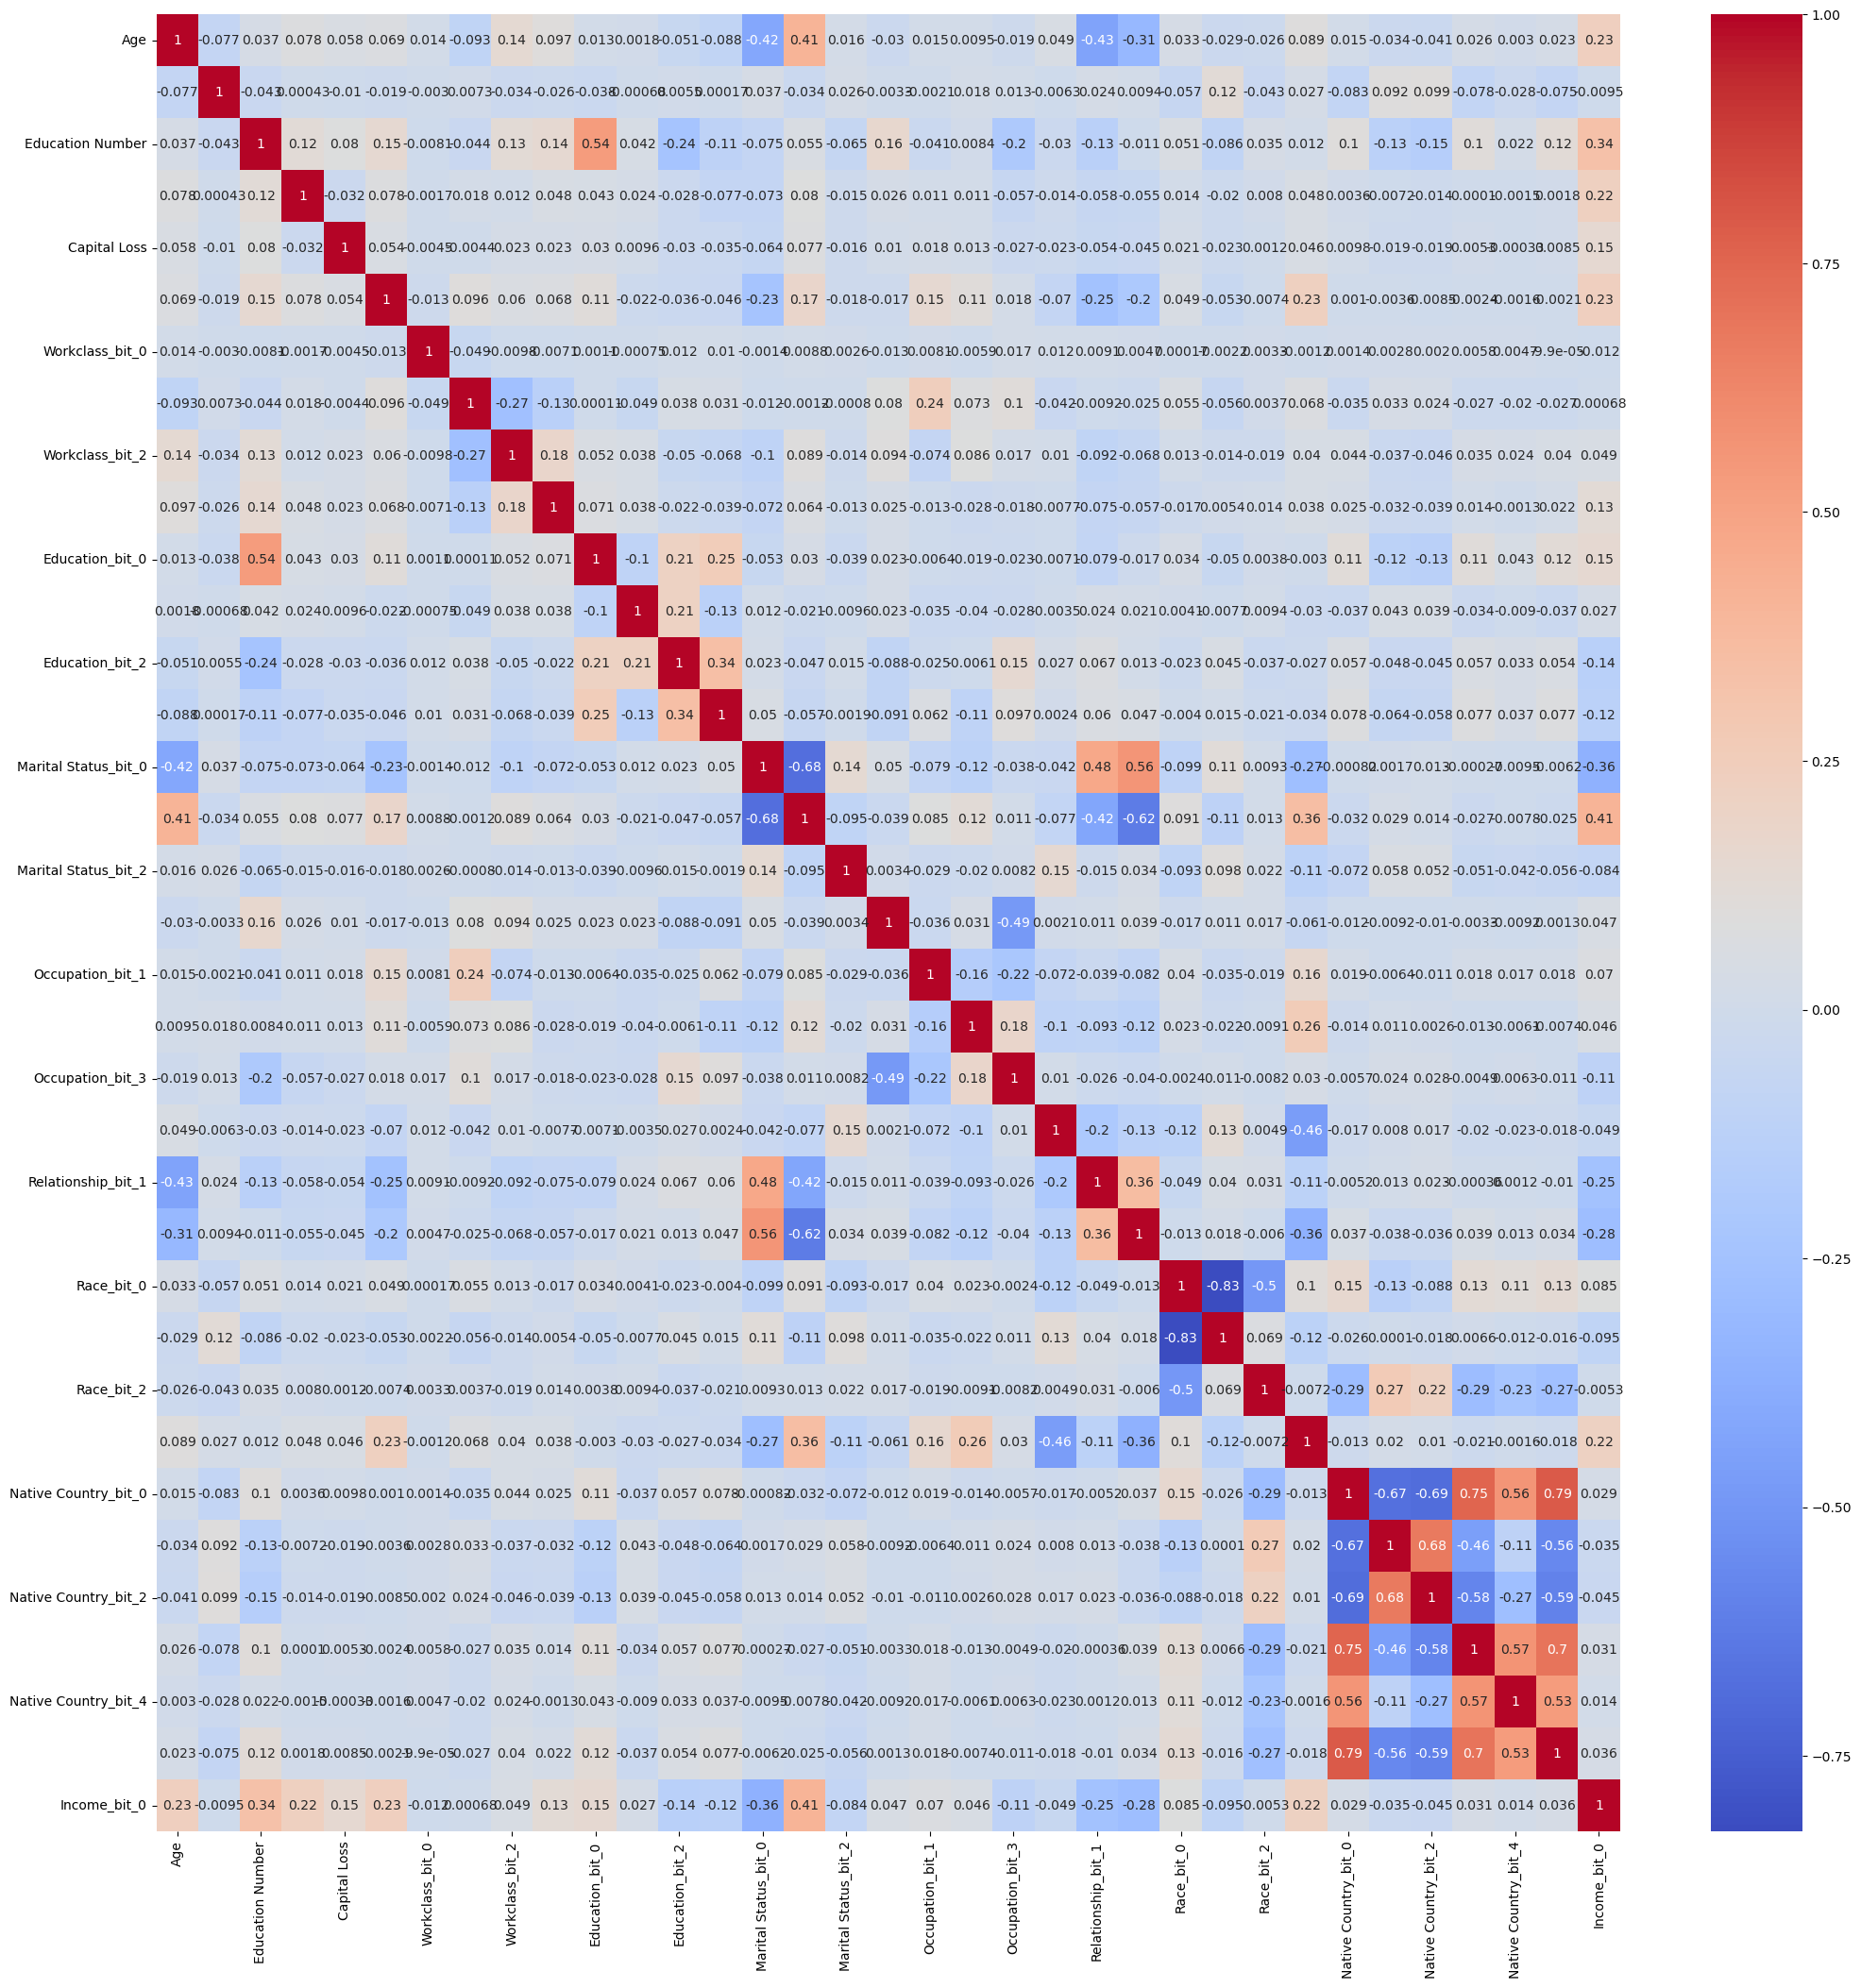

In [16]:
heatmap=processed_train_data.corr()
sns.heatmap(heatmap,annot=True,cmap='coolwarm')
plt.gcf().set_size_inches(25, 25)

### 3.2 Model development and evaluation

#### 3.2.1 Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
X_train = processed_train_data.drop('Income_bit_0', axis=1)
y_train = processed_train_data['Income_bit_0']
X_test = processed_test_data.drop('Income_bit_0', axis=1)
y_test = processed_test_data['Income_bit_0']

logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", class_report)


Accuracy: 0.8446655610834716
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90     12435
           1       0.74      0.53      0.62      3846

    accuracy                           0.84     16281
   macro avg       0.80      0.74      0.76     16281
weighted avg       0.84      0.84      0.84     16281



##### 3.2.1.1 Hyperparameter tune

In [ ]:
from sklearn.model_selection import GridSearchCV

# define param grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2','elasticnet'],
    'tol': [1e-4, 1e-3, 1e-2],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# build model
logistic = LogisticRegression(max_iter=1000)

# GridSearchCV
grid_search = GridSearchCV(logistic, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# get best params and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# use best params
best_logistic = LogisticRegression(**best_params, max_iter=1000)
best_logistic.fit(X_train, y_train)
y_pred_best = best_logistic.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)
print("Test Set Accuracy:", accuracy_best)


##### 3.2.1.2 Model evaluation

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# get result
results = pd.DataFrame(grid_search.cv_results_)

# choose parameters
param_1 = 'param_C'
param_2 = 'param_solver'

# plot
pivot_table = results.pivot_table(values='mean_test_score', 
                                  index=[param_1], 
                                  columns=[param_2])

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu')
plt.title('Grid Search Scores')
plt.xlabel('Solver')
plt.ylabel('C (Regularization Strength)')
plt.show()

#### 3.2.2 KNN Classifier

In [10]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=20)
KNN.fit(X_train.to_numpy(), y_train.to_numpy())
y_pred = KNN.predict(X_test.to_numpy())

cm = classification_report(y_test.to_numpy(),y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12435
           1       0.71      0.57      0.63      3846

    accuracy                           0.84     16281
   macro avg       0.79      0.75      0.77     16281
weighted avg       0.84      0.84      0.84     16281



##### 3.2.2.1 Hyperparameter tune

In [11]:
from sklearn.model_selection import cross_val_score

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

k_range = range(1,50)
k_scores = []

for k in k_range:
    KNN = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(KNN, X_val.to_numpy(), y_val.to_numpy(), cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)
print(k_scores.index(max(k_scores)))

[0.7945647564388907, 0.8162105491315861, 0.8231225203320987, 0.8231206355488959, 0.8257310602847907, 0.8271118995787509, 0.8275741426592406, 0.8294184030231921, 0.8320276497695852, 0.8343329752245248, 0.8354070660522274, 0.836941043981416, 0.8349448229717377, 0.8360207985826431, 0.8360189137994402, 0.8374032870619057, 0.8358653039684111, 0.8355587911000537, 0.8347919199344096, 0.8354065948564265, 0.8358660107621121, 0.8363270758531, 0.8366338243193578, 0.8375557189034332, 0.8375557189034332, 0.8374011666808027, 0.835251335840095, 0.8378627029675911, 0.8375552477076325, 0.8386302809269364, 0.8384747863127044, 0.8386295741332355, 0.8398572747919669, 0.8383211764816751, 0.8377072083533591, 0.8369408083835157, 0.8357126365289831, 0.8360191493973405, 0.8363254266677975, 0.8361734660220707, 0.8370946538124452, 0.8369396303940139, 0.8366331175256565, 0.8369393947961136, 0.8366319395361549, 0.835095134432162, 0.8366321751340553, 0.8354035320837221, 0.8357100449520795]
32


Text(0, 0.5, 'Cross-Validated Accuracy')

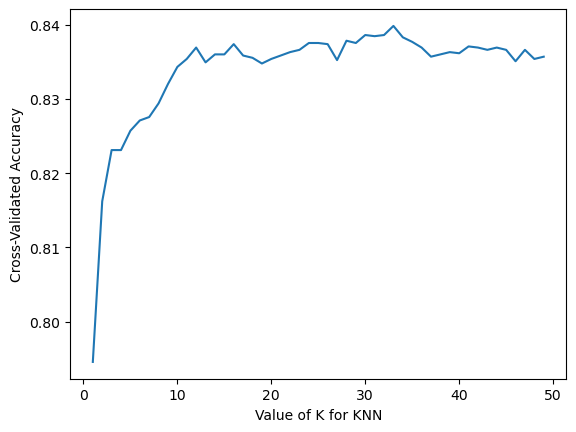

In [12]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

##### 3.2.2.2 Model evaluation

Re-build the KNN model with best performed number of neighbors

In [13]:
KNN = KNeighborsClassifier(n_neighbors=k_scores.index(max(k_scores)))
KNN.fit(X_train.to_numpy(), y_train.to_numpy())
y_pred = KNN.predict(X_test.to_numpy())

cm = classification_report(y_test.to_numpy(),y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12435
           1       0.70      0.57      0.63      3846

    accuracy                           0.84     16281
   macro avg       0.79      0.75      0.76     16281
weighted avg       0.83      0.84      0.84     16281



In [14]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 50))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(KNN, param_grid, cv=10, scoring='accuracy')
grid_search = grid.fit(X_train.to_numpy(), y_train.to_numpy())
print (grid_search.best_score_)
print (grid_search.best_params_)
print (grid_search.best_estimator_)

0.8389895509934517
{'n_neighbors': 45}
KNeighborsClassifier(n_neighbors=45)


In [15]:
KNN = KNeighborsClassifier(n_neighbors=grid_search.best_index_)
KNN.fit(X_train.to_numpy(), y_train.to_numpy())
y_pred = KNN.predict(X_test.to_numpy())

cm = classification_report(y_test.to_numpy(),y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12435
           1       0.70      0.56      0.62      3846

    accuracy                           0.84     16281
   macro avg       0.79      0.74      0.76     16281
weighted avg       0.83      0.84      0.83     16281



#### 3.2.3 Naive Bayes Classifier

Three types of Naive Bayers models are used here, which are Gaussian, Bernoulli, and Multinomial Navier Bayers models.
Which model fits the dataset best depends on the distribution that the dataset follows. 

In [16]:
from sklearn.naive_bayes import GaussianNB
GaussNB = GaussianNB()
GaussNB.fit(X_train, y_train)
y_pred = GaussNB.predict(X_test)
cm = classification_report(y_test,y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.95      0.67      0.78     12435
           1       0.45      0.88      0.59      3846

    accuracy                           0.72     16281
   macro avg       0.70      0.77      0.69     16281
weighted avg       0.83      0.72      0.74     16281



In [17]:
from sklearn.naive_bayes import BernoulliNB
BernoNB = BernoulliNB(force_alpha=True)
BernoNB.fit(X_train, y_train)
y_pred = BernoNB.predict(X_test)
cm = classification_report(y_test,y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.90      0.82      0.86     12435
           1       0.54      0.70      0.61      3846

    accuracy                           0.79     16281
   macro avg       0.72      0.76      0.74     16281
weighted avg       0.82      0.79      0.80     16281



In [18]:
from sklearn.naive_bayes import MultinomialNB

#Negative value is not acceptable for the multinomial Naive Bayers. Thus, undo the step of standardlization of continuous features
processed_train_data_ = pd.concat([train_data[continuous_columns], binary_encoded_train], axis=1)
processed_test_data_ = pd.concat([test_data[continuous_columns], binary_encoded_test], axis=1)
X_train = processed_train_data_.drop('Income_bit_0', axis=1)
y_train = processed_train_data_['Income_bit_0']
X_test = processed_test_data_.drop('Income_bit_0', axis=1)
y_test = processed_test_data_['Income_bit_0']

MultiNomNB = MultinomialNB()
MultiNomNB.fit(X_train, y_train)
y_pred = MultiNomNB.predict(X_test)
cm = classification_report(y_test,y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.80      0.96      0.87     12435
           1       0.62      0.23      0.34      3846

    accuracy                           0.79     16281
   macro avg       0.71      0.59      0.60     16281
weighted avg       0.76      0.79      0.75     16281



#### 3.2.4 Random Forest Classifier

In [19]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train = processed_train_data.drop('Income_bit_0', axis=1)
y_train = processed_train_data['Income_bit_0']
X_test = processed_test_data.drop('Income_bit_0', axis=1)
y_test = processed_test_data['Income_bit_0']


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

##### 3.2.4.3 Hyperparameter tune

In [20]:
rf_classifier = RandomForestClassifier(random_state=42)

In [21]:
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2']
}

In [22]:
random_search = RandomizedSearchCV(rf_classifier, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [None, 10, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150]},
                   random_state=42, scoring='accuracy')

In [23]:
print("Best Hyperparameters_RandomSearch:", random_search.best_params_)

Best Hyperparameters_RandomSearch: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': None}


In [24]:
best_rf_model_Random = random_search.best_estimator_
y_pred = best_rf_model_Random.predict(X_val)

In [25]:
accuracy = accuracy_score(y_val, y_pred)
print("Random Search Validation Accuracy:", accuracy)

Random Search Validation Accuracy: 0.8654997696913864


In [26]:
confusion_mat = confusion_matrix(y_val, y_pred)
print("Random Search Confusion Matrix:\n", confusion_mat)

Random Search Confusion Matrix:
 [[4701  241]
 [ 635  936]]


In [27]:
class_report = classification_report(y_val, y_pred)
print("Random Search Classification Report:\n", class_report)

Random Search Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      4942
           1       0.80      0.60      0.68      1571

    accuracy                           0.87      6513
   macro avg       0.84      0.77      0.80      6513
weighted avg       0.86      0.87      0.86      6513



In [28]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2']
}

In [29]:
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [30]:
print("Best Hyperparameters_GridSearch:", grid_search.best_params_)

Best Hyperparameters_GridSearch: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


**The processing time of Grid Search is much slower than Random Search.The different results of these two kinds of hyperparameter tuning methods are:   
Random Search: "min_samples_split": 10,"n_estimators": 100,   
Grid Search: "min_samples_split": 2, "n_estimators:: 150  
Compare the performance for the validation set: (Random Search already done)
**

In [31]:
best_rf_model_Grid = grid_search.best_estimator_
y_pred = best_rf_model_Grid.predict(X_val)

In [32]:
accuracy = accuracy_score(y_val, y_pred)
print("Grid Search Validation Accuracy:", accuracy)

Grid Search Validation Accuracy: 0.8661139259941655


In [33]:
confusion_mat = confusion_matrix(y_val, y_pred)
print("Grid Search Confusion Matrix:\n", confusion_mat)

Grid Search Confusion Matrix:
 [[4705  237]
 [ 635  936]]


In [34]:
class_report = classification_report(y_val, y_pred)
print("Grid Search Classification Report:\n", class_report)

Grid Search Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.92      4942
           1       0.80      0.60      0.68      1571

    accuracy                           0.87      6513
   macro avg       0.84      0.77      0.80      6513
weighted avg       0.86      0.87      0.86      6513



##### 3.2.4.3 Model evaluation

**The performances from the random grid is better. Just use the hyperparameter from random grid to train the test dataset** 

In [35]:
best_rf_model_Random = random_search.best_estimator_
y_test_pred = best_rf_model_Random.predict(X_test)

In [36]:
accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8618635218966894


In [37]:
confusion_mat = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", confusion_mat)

Confusion Matrix:
 [[11877   558]
 [ 1691  2155]]


In [38]:
class_report = classification_report(y_test, y_test_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.91     12435
           1       0.79      0.56      0.66      3846

    accuracy                           0.86     16281
   macro avg       0.83      0.76      0.79     16281
weighted avg       0.86      0.86      0.85     16281

